About Dataset

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C. The dataset contains the summary of the 14 batteries.

Variables:

    Cycle Index: number of cycle
    F1: Discharge Time (s)
    F2: Time at 4.15V (s)
    F3: Time Constant Current (s)
    F4: Decrement 3.6-3.4V (s)
    F5: Max. Voltage Discharge (V)
    F6: Min. Voltage Charge (V)
    F7: Charging Time (s)
    Total time (s)
    RUL: target


# Install necessary packages

# Import necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset

In [ ]:
data = pd.read_csv('./Battery_RUL.csv')

FileNotFoundError: ignored

# Display the first few rows of the dataset

In [ ]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# Explore basic statistics of the dataset

In [ ]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


# Check for missing values

In [ ]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

# Visualize the distribution of the target variable (RUL)

Text(0.5, 0, 'Sorted RUL')

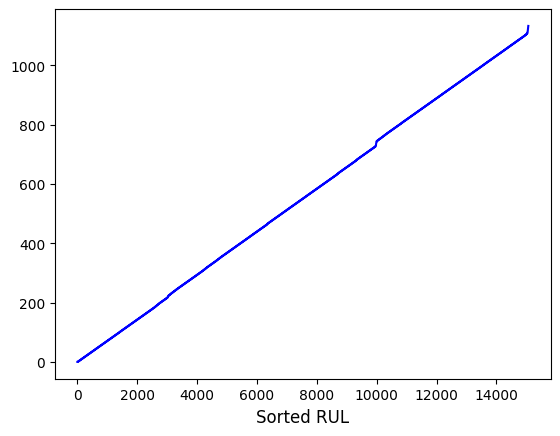

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(sorted(data['RUL']), color='blue')
ax.set_xlabel('Sorted RUL', fontsize=12)

# Define features and target variable

In [ ]:
target = 'RUL'
features = [_ for _ in data if _ not in [target]]

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=11)

# Train a linear regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model performance

In [ ]:
loss = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {loss}')

Root Mean Squared Error: 7.02418365836119
